### 판다스 내장 그래프 도구
 - 판다스는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 import하지 않고 간단히 그래프를 그릴 수 있음.
 - 선 그래프 : plot()메소드 적용 시 다른 옵션을 추가하지 않으며 가장 기본적인 선 그래프를 그림.
 - 막대 그래프 : plot(kind='bar')
 - 히스토그램 : plot(kind='hist')
 - 산점도 : plot(x='', y='', kind='scatter'), 상관관계를 볼 수 있음.
 - 박스플롯 : plot(kind='box'), 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공

### 남북한 발전 전력량
### Q.남한, 북한 발전량 합계 데이터만 추출, df_ns 이름으로 저장 및 출력하세요
 - (단, 행인덱스는 South, North로 열인덱스는 정수형, 열 이름 배열에 map(int))

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel('남북한발전전력량.xlsx') # 데이터 프레임 변환
df_ns = df.iloc[[0,5],2:]
print(type(df_ns.columns))
df_ns.index=['South','North']
df_ns.columns=df_ns.columns.astype('int')   # 열 이름의 자료형을 정수형으로 변경
display(df_ns)
print(type(df_ns.columns))

<class 'pandas.core.indexes.base.Index'>


,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
South,1077,1186,1310,1444,1650,1847,2055,2244,2153,2393,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
North,277,263,247,221,231,230,213,193,170,186,...,236,255,235,237,211,215,221,216,190,239


<class 'pandas.core.indexes.numeric.Int64Index'>


,South,North
1990,1077,277
1991,1186,263
1992,1310,247
1993,1444,221
1994,1650,231


,South
1990,1077
1991,1186
1992,1310
1993,1444
1994,1650


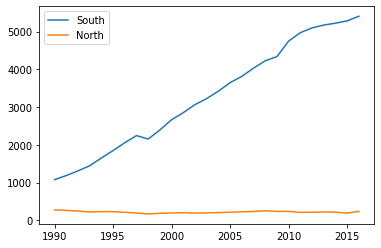

In [2]:
tdf_ns = df_ns.T
display(tdf_ns.head()) #전치하여 출력
display(tdf_ns.loc[:,['South']].head()) #남한꺼만 뽑고싶다.
tdf_ns.plot()

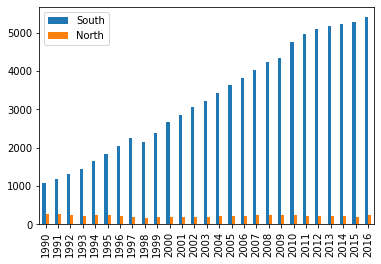

In [3]:
# 행, 열 전치하여 막대 그래프 그리기
tdf_ns.plot(kind='bar')

,South
1990,1077
1991,1186
1992,1310
1993,1444
1994,1650
1995,1847
1996,2055
1997,2244
1998,2153
1999,2393


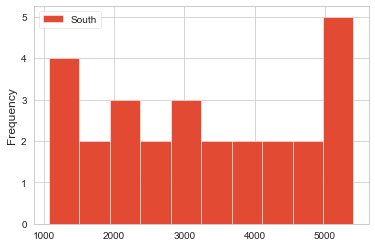

In [37]:
# 행, 열 전치하여 히스토그램 그리기
tdf_s = tdf_ns.loc[:,['South']]
display(tdf_s)
tdf_s.plot(kind='hist')
# tdf_ns.cumsum().plot(kind='hist')
# tdf_ns.plot('kind=hist')
# tdf_ns.North.plot('kind=hist')
# tdf_ns.South.plot('kind=hist')

### Q. df_s 에서 mpg와 각 칼럼간의 산점도를 그리고 음의 상관관계가 있는 변수를 기술하세요.

In [5]:
df = pd.read_csv('../auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower',
              'weight','acceleration','model year','origin','name']
df_s = df[['mpg','cylinders','weight','displacement','acceleration' ]]
df_s.head()

,mpg,cylinders,weight,displacement,acceleration
0,18.0,8,3504.0,307.0,12.0
1,15.0,8,3693.0,350.0,11.5
2,18.0,8,3436.0,318.0,11.0
3,16.0,8,3433.0,304.0,12.0
4,17.0,8,3449.0,302.0,10.5


In [6]:
df_s.corr()

,mpg,cylinders,weight,displacement,acceleration
mpg,1.000000,-0.775396,-0.831741,-0.804203,0.420289
cylinders,-0.775396,1.000000,0.896017,0.950721,-0.505419
weight,-0.831741,0.896017,1.000000,0.932824,-0.417457
displacement,-0.804203,0.950721,0.932824,1.000000,-0.543684
acceleration,0.420289,-0.505419,-0.417457,-0.543684,1.000000


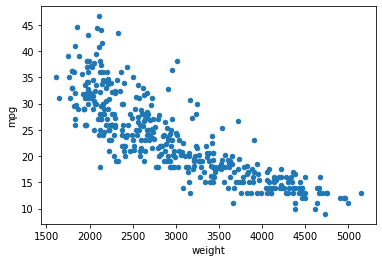

In [7]:
# 2개의 열을 선택하여 산점도 그리기
df_s.plot(x='weight', y='mpg', kind='scatter')
# 음의 상관관계

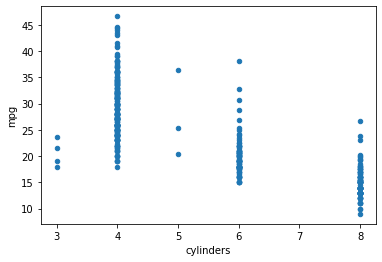

In [8]:
df_s.plot(x='cylinders', y='mpg', kind='scatter')
# 범주형 데이터 (연속이 없음)
# 숫자의 크기보다 카테고리의 의미

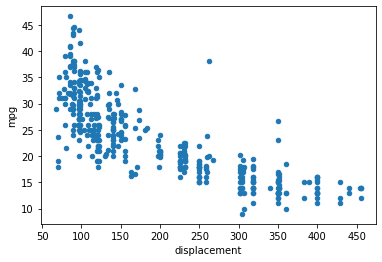

In [9]:
df_s.plot(x='displacement', y='mpg', kind='scatter')
# 음의 상관관계, 이상치 제거 필요

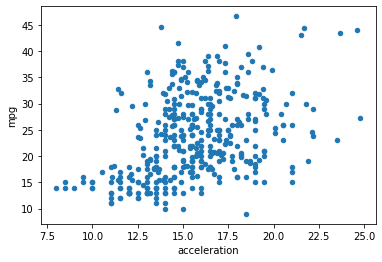

In [10]:
df_s.plot(x='acceleration', y='mpg', kind='scatter')

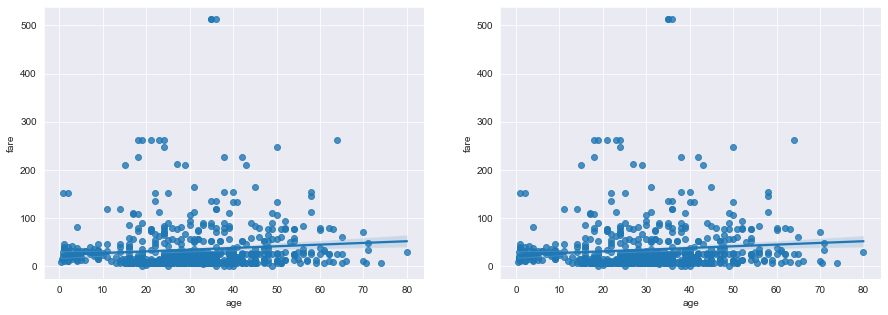

In [11]:
#titanic age, fare 컬럼간 상관관계
import matplotlib.pyplot as plt
%matplotlib inline
titanic = sns.load_dataset('titanic')

#스타일 테마 설정(5가지 : darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

# 그래프 객체 생성(figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,2,1) # 1행 2열의 1번째 좌표(전체 데이터를 1행 2열짜리로 보기 때문에 이렇게선택)
ax2=fig.add_subplot(1,2,2) # 1행 2열의 2번째 좌표

# 그래프 그리기 - 선형 회귀선 미표시 (fit_reg=False)
sns.regplot(x='age',        #x축 변수
           y='fare',        #y축 변수
           data=titanic,    #data
           ax=ax1)          # axe 객체 - 1번째 그래프
           

#그래프 그리기 - 선형회귀선 표시 (fit_reg=True)
sns.regplot(x='age',        #x축 변수
           y='fare',        #y축 변수
           data=titanic,    #data
           ax=ax2,          # axe 객체 - 2번째 그래프
           fit_reg=True)   # 회귀선 표시

plt.show()

### Q.auto-mpg.csv의 df_s 각 컬럼간의 상관관계에 대한 시각화를 아래와 같이 수행하세요.
 - 2개의 행과 2개의 열을 가진 subplots를 이용해서 표현
 - seaborn의 regplot을 이용해 산점도와 선형회귀직선을 함께 표현

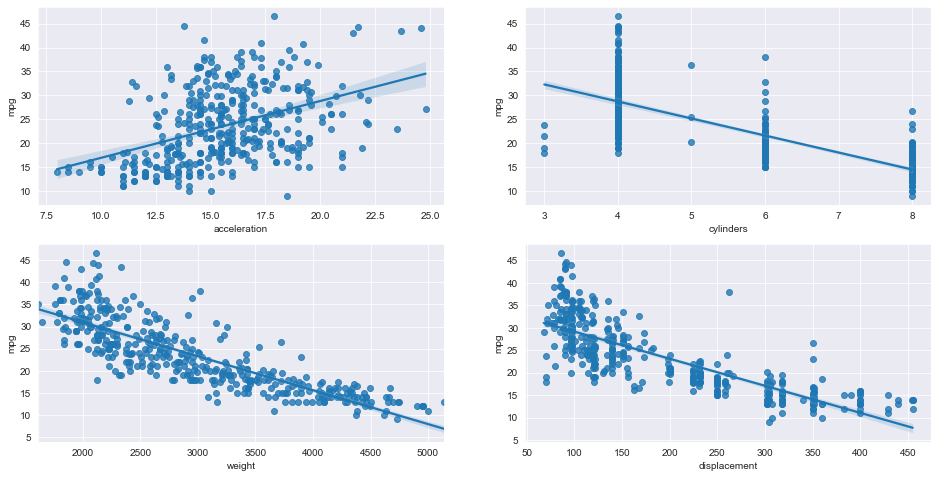

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, axs = plt.subplots(figsize=(16,8), ncols=2, nrows=2)  # 2행 2열 차트를 만든다.
lm_features = ['acceleration', 'cylinders', 'weight', 'displacement']
for i, feature in enumerate(lm_features): # 인덱스와 같이 작동하는 것
    row = int(i/2) #처음 인덱스는 0
    col = i%2      # 컬럼도 처음에 0
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='mpg', data=df_s, ax=axs[row][col])

### Box plot 의미 해석
 - 중앙값
 - IQR(Inter Quartile Range): 제 3사분위 수 - 제 1사분위 수
 - lower whisker : Q1 - 1.5 * IQR 보다 작은 값
 - upper whisker : Q3 - 1.5 * IQR 보다 큰 값
 - 이상치 : lower whisker, upper whisker 를 벗어나는 값
   - (an outlier is any number less than Q1 - (1.5xIQR) or greater than Q3+(1.5xIQR))

In [13]:
import pandas as pd

box_df = pd.DataFrame([[25, 28, 29, 29, 30, 34, 35, 35, 37, 38],
                      [25, 28, 29, 29, 30, 34, 35, 35, 37, 50]],
                       index=['m1','m2'],
                       columns=['y1','y2','y3','y4','y5','y6','y7','y8','y9','y10'])
display(box_df)
box_t = box_df.transpose()
display(box_t.head(2))

,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10
m1,25,28,29,29,30,34,35,35,37,38
m2,25,28,29,29,30,34,35,35,37,50


,m1,m2
y1,25,25
y2,28,28


,m1,m2
count,10.000000,10.000000
mean,32.000000,33.200000
std,4.346135,7.020605
min,25.000000,25.000000
25%,29.000000,29.000000
50%,32.000000,32.000000
75%,35.000000,35.000000
max,38.000000,50.000000


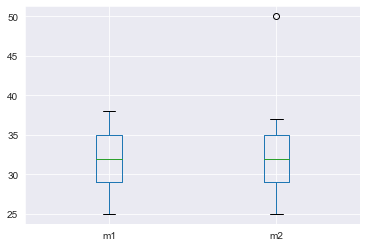

In [14]:
box_t[['m1','m2']].plot(kind='box')
display(box_t.describe())

### Q. box_t의 m2칼럼의 box_plot의 중앙값, IQR, lower whisker, upper whisker, 이상치를 구하여 기술하세요.

In [15]:
# upper, lower whisker 산출
uw = 35 + 1.5 * 6
print(uw)
lw = 29 - 1.5 * 6
print(lw)

# 이상치 : 44보다 큰 수 50
m2 = [25, 28, 29, 29, 30, 34, 35, 35, 37, 50]

44.0
20.0


In [16]:
# ●김홍교님 풀이
# Q box_t의 m2컬럼의 box plot의 중앙값, IQR,lower whisker,upper whisker,이상치를 구하여 기술하세요. 
import numpy as np
x = box_t.m2
m=x.median()
print("m2컬럼의 box plot의 중앙값 : ",m)

Q1=x.quantile(0.25)
Q3=x.quantile(0.75)
print(Q1)
print(Q3)
IQR = Q3-Q1
print('IQR : ',IQR)

y=Q1-1.5*IQR
z=x-y
lowerWhisker=z[z>0].min()+y
print('lowerWhisker : ',lowerWhisker)

y=Q3+1.5*IQR
z=x-y
upperWhisker=z[z<0].max()+y
print('upperWhisker : ',upperWhisker)

Outlierlist=x[(m-1.5*IQR>x)|(m+1.5*IQR<x)].tolist
print('Outlierlist : ',Outlierlist)

m2컬럼의 box plot의 중앙값 :  32.0
29.0
35.0
IQR :  6.0
lowerWhisker :  25.0
upperWhisker :  37.0
Outlierlist :  <bound method IndexOpsMixin.tolist of y10    50
Name: m2, dtype: int64>


In [17]:
median = box_t['m2'].median() #중앙값
Q1 = box_t['m2'].quantile(.25)
Q3 = box_t['m2'].quantile(.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * box_t['m2'][box_t.m2<IQR]
upper = Q3 - 1.5 * box_t['m2'][box_t['m2']>IQR]

display(median, IQR, Q1, Q3, lower, upper)

32.0

6.0

29.0

35.0

Series([], Name: m2, dtype: float64)

y1     -2.5
y2     -7.0
y3     -8.5
y4     -8.5
y5    -10.0
y6    -16.0
y7    -17.5
y8    -17.5
y9    -20.5
y10   -40.0
Name: m2, dtype: float64

### Q. 'auto-mpg.csv' 데이터셋을 불러와서 'mpg','cylinders' 칼럼의 boxplot을 그리고 중앙값, IQR, lower whisker, upper whisker 값을 구하고 이상치 갯수를 구하여 기술하세요.

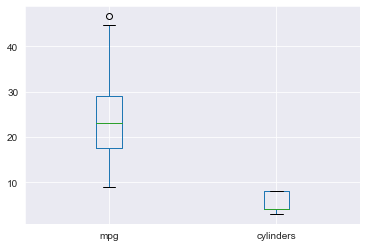

In [18]:
#열을 선택하여 박스 플롯 그리기
import pandas as pd

df = pd.read_csv('../auto-mpg.csv')
df.columns = ['mpg','cylinders', 'displacement', 'horsepower',
              'weight', 'acceleration','model year','origin','name']
df[['mpg','cylinders']].plot(kind='box')

In [19]:
df_s.mpg.describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [20]:
# mpg 기준 내림차순 정렬
df_s = df.sort_values(by='mpg', ascending=False)
df_s.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
321,46.6,4,86.0,65.00,2110.0,17.9,80,3,mazda glc
328,44.6,4,91.0,67.00,1850.0,13.8,80,3,honda civic 1500 gl
324,44.3,4,90.0,48.00,2085.0,21.7,80,2,vw rabbit c (diesel)
393,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
325,43.4,4,90.0,48.00,2335.0,23.7,80,2,vw dasher (diesel)


In [21]:
# mpg의 이상치 : 46.6
# IQR : 11.5
uw_m = 29 + (11.5*1.5)
print(uw_m)
lw_m = 17.5 - (11.5*1.5)
print(lw_m)

46.25
0.25


### Matplotlib 기본 그래프 도구

In [22]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Excel 데이터를 데이터프레임 변환
df = pd.read_excel('시도별 전출입 인구수.xlsx', fillna=0, header=0)
df['전입지별'].unique()

array(['전입지별', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [23]:
# df.info()
display(df.전출지별.isnull().sum())

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합 부분)
df = df.fillna(method='ffill')
df.head()

306

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [24]:
df.전출지별.isnull().sum()

0

In [25]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask] # mask를 통해 새로 컬럼 추가

df_seoul = df_seoul.drop(['전출지별'], axis=1)                # 기존에 있는 전출지별은 드랍시킨다.
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True) # 딕셔너리타입으로 이름 변경
df_seoul.set_index('전입지', inplace=True)                   # 전입지를 index로 만든다(전입지별로 데이터를 정렬하기 위해)
df_seoul.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


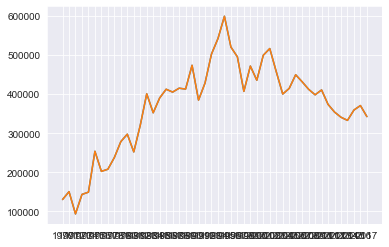

In [26]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도'] #행 선택

# x, y 축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

# 판다스 객체를 plot 함수에 입력
plt.plot(sr_one)

In [27]:
import warnings
warnings.filterwarnings('ignore')

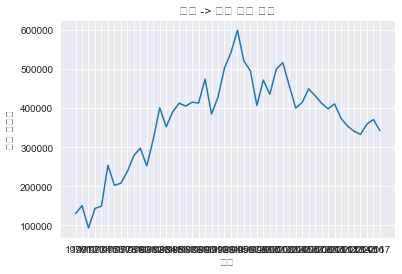

In [28]:
# 정리
import pandas as pd
import matplotlib.pyplot as plt

# EXCEL 데이터를 데이터프레임 변환
df = pd.read_excel('시도별 전출입 인구수.xlsx', fillna=0, header=0)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움(엑셀양식 병합 부분)
df = df.fillna(method='ffill')

#서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]             # mask를 통해 새로 컬럼 추가
df_seoul = df_seoul.drop(['전출지별'], axis=1)                # 기존에 있는 전출지별은 드랍시킨다.
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True) # 딕셔너리타입으로 이름 변경
df_seoul.set_index('전입지', inplace=True)                   # 전입지를 index로 만든다(전입지별로 데이터를 정렬하기 위해)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도'] #행 선택

# x, y 축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()  # 변경사항 저장하고 그래프 출력

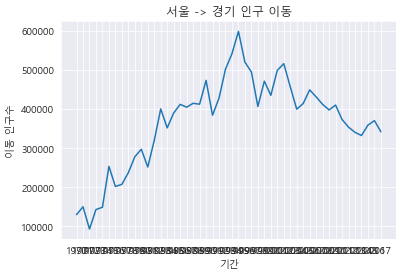

In [29]:
# Matplotlib 한글 폰트 오류 해결
from matplotlib import font_manager, rc
font_path = "../malgun.ttf" # 폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 정리
import pandas as pd
import matplotlib.pyplot as plt

# EXCEL 데이터를 데이터프레임 변환
df = pd.read_excel('시도별 전출입 인구수.xlsx', fillna=0, header=0)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움(엑셀양식 병합 부분)
df = df.fillna(method='ffill')

#서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]             # mask를 통해 새로 컬럼 추가
df_seoul = df_seoul.drop(['전출지별'], axis=1)                # 기존에 있는 전출지별은 드랍시킨다.
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True) # 딕셔너리타입으로 이름 변경
df_seoul.set_index('전입지', inplace=True)                   # 전입지를 index로 만든다(전입지별로 데이터를 정렬하기 위해)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도'] #행 선택

# x, y 축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()  # 변경사항 저장하고 그래프 출력

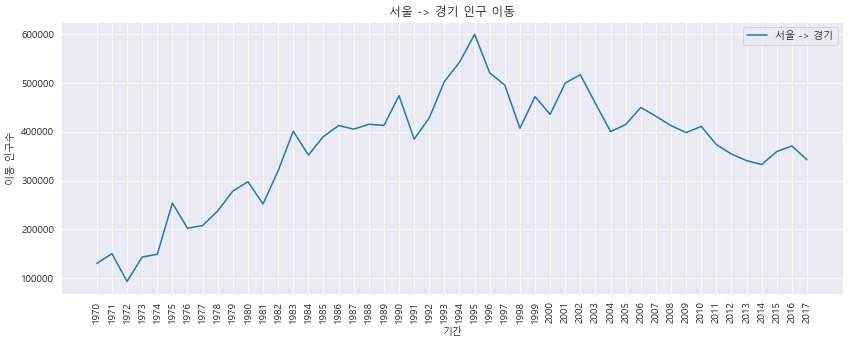

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Matplotlib 한글 폰트 오류 해결
from matplotlib import font_manager, rc
font_path = "../malgun.ttf" # 폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# EXCEL 데이터를 데이터프레임 변환
df = pd.read_excel('시도별 전출입 인구수.xlsx', fillna=0, header=0)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움(엑셀양식 병합 부분)
df = df.fillna(method='ffill')

#서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]             # mask를 통해 새로 컬럼 추가
df_seoul = df_seoul.drop(['전출지별'], axis=1)                # 기존에 있는 전출지별은 드랍시킨다.
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True) # 딕셔너리타입으로 이름 변경
df_seoul.set_index('전입지', inplace=True)                   # 전입지를 index로 만든다(전입지별로 데이터를 정렬하기 위해)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도'] #행 선택

# 그림 사이즈 지정( 가로 14인치, 세로 5인치)
plt.figure(figsize=(14,5))

# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')

# x, y 축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')     #차트 제목
plt.xlabel('기간')                      #x축
plt.ylabel('이동 인구수')               #y축

plt.legend(labels=['서울 -> 경기'], loc='best')   #범례 표시

plt.show()  # 변경사항 저장하고 그래프 출력

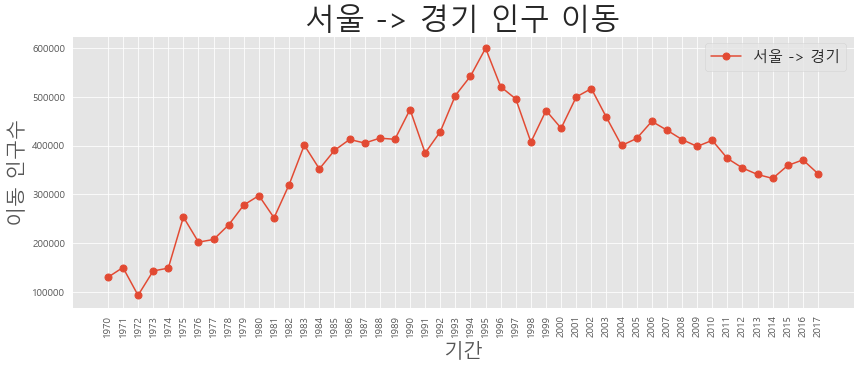

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Matplotlib 한글 폰트 오류 해결
from matplotlib import font_manager, rc
font_path = "../malgun.ttf" # 폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# EXCEL 데이터를 데이터프레임 변환
df = pd.read_excel('시도별 전출입 인구수.xlsx', fillna=0, header=0)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움(엑셀양식 병합 부분)
df = df.fillna(method='ffill')

#서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]             # mask를 통해 새로 컬럼 추가
df_seoul = df_seoul.drop(['전출지별'], axis=1)                # 기존에 있는 전출지별은 드랍시킨다.
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True) # 딕셔너리타입으로 이름 변경
df_seoul.set_index('전입지', inplace=True)                   # 전입지를 index로 만든다(전입지별로 데이터를 정렬하기 위해)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도'] #행 선택

#스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈 지정( 가로 14인치, 세로 5인치)
plt.figure(figsize=(14,5))

# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')

# x, y 축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=7) # 마커표시 추가

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동', size=30)     #차트 제목
plt.xlabel('기간', size=20)                      #x축
plt.ylabel('이동 인구수', size=20)               #y축

plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)   #범례 표시

plt.show()  # 변경사항 저장하고 그래프 출력

In [32]:
import matplotlib.pyplot as plt

#스타일 리스트 출력
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


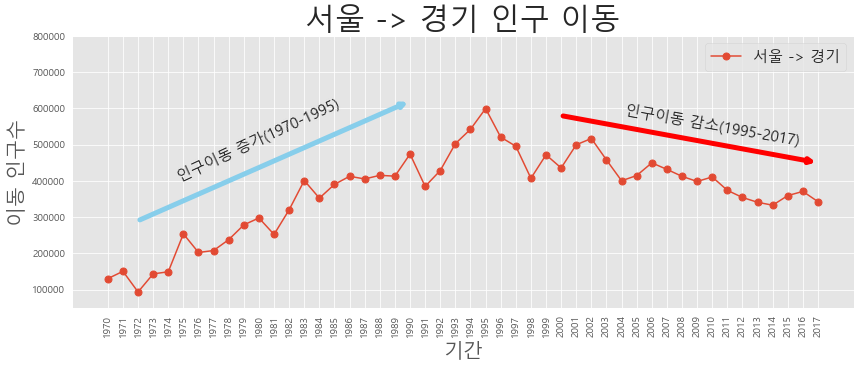

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Matplotlib 한글 폰트 오류 해결
from matplotlib import font_manager, rc
font_path = "../malgun.ttf" # 폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# EXCEL 데이터를 데이터프레임 변환
df = pd.read_excel('시도별 전출입 인구수.xlsx', fillna=0, header=0)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움(엑셀양식 병합 부분)
df = df.fillna(method='ffill')

#서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]             # mask를 통해 새로 컬럼 추가
df_seoul = df_seoul.drop(['전출지별'], axis=1)                # 기존에 있는 전출지별은 드랍시킨다.
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True) # 딕셔너리타입으로 이름 변경
df_seoul.set_index('전입지', inplace=True)                   # 전입지를 index로 만든다(전입지별로 데이터를 정렬하기 위해)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도'] #행 선택

#스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈 지정( 가로 14인치, 세로 5인치)
plt.figure(figsize=(14,5))

# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')

# x, y 축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=7) # 마커표시 추가

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동', size=30)     #차트 제목
plt.xlabel('기간', size=20)                      #x축
plt.ylabel('이동 인구수', size=20)               #y축

plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)   #범례 표시

# y축 범위 지정(최소값, 최대값)
plt.ylim(50000, 800000)

#주석 표시 - 화살표
plt.annotate('',
            xy=(20, 620000),             #화살표의 머리 시작
            xytext=(2, 290000),          #화살표의 머리 마지막
            xycoords='data',             #좌표체계
            arrowprops=dict(arrowstyle='->', color='skyblue', lw=5),  #화살표 서식
            )

plt.annotate('',
            xy=(47, 450000),             #화살표의 머리 시작
            xytext=(30, 580000),          #화살표의 머리 마지막
            xycoords='data',             #좌표체계
            arrowprops=dict(arrowstyle='->', color='red', lw=5),  #화살표 서식
            )

#주석 표시 - 텍스트
plt.annotate('인구이동 증가(1970-1995)',       #텍스트 입력
            xy=(10,400000),                    #텍스트 위치 기준점
            rotation=25,                       #텍스트 회전 각도
            va='baseline',                     #텍스트 상하 정렬
            ha='center',                       #텍스트 좌우 정렬
            fontsize=15)                       #폰트 크기

plt.annotate('인구이동 감소(1995-2017)',       #텍스트 입력
            xy=(40,500000),                    #텍스트 위치 기준점
            rotation=-10,                       #텍스트 회전 각도
            va='baseline',                     #텍스트 상하 정렬
            ha='center',                       #텍스트 좌우 정렬
            fontsize=15)                       #폰트 크기

plt.show()  # 변경사항 저장하고 그래프 출력

### Q. '서울 -> 충남, 경북, 강원 인구 이동'을 설명하는 그래프를 출력하세요.

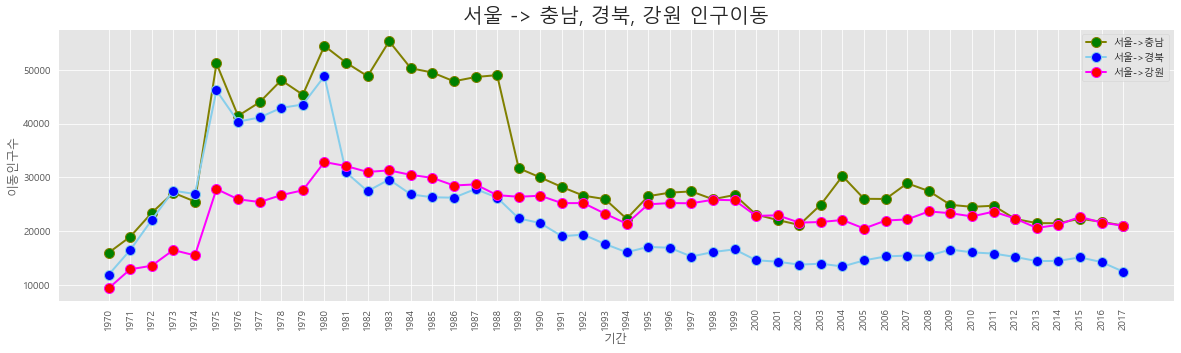

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Matplotlib 한글 폰트 오류 해결
from matplotlib import font_manager, rc
font_path = "C:/Users/USER/workspace/ml_python/malgun.ttf" # 폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# EXCEL 데이터를 데이터프레임 변환
df = pd.read_excel('시도별 전출입 인구수.xlsx', fillna=0, header=0)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움(엑셀양식 병합 부분)
df = df.fillna(method='ffill')

#서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]             # mask를 통해 새로 컬럼 추가
df_seoul = df_seoul.drop(['전출지별'], axis=1)                # 기존에 있는 전출지별은 드랍시킨다.
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True) # 딕셔너리타입으로 이름 변경
df_seoul.set_index('전입지', inplace=True)                   # 전입지를 index로 만든다(전입지별로 데이터를 정렬하기 위해)

# 서울에서 충남, 경북, 강원도로 이동한 인구 데이터 값만 선택
col_years=list(map(str, range(1970, 2018)))
df_3=df_seoul.loc[['충청남도','경상북도','강원도'],col_years]

#스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈 지정( 가로 14인치, 세로 5인치)
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1) # 1행 1열에 하나

# axe 객체에  plot 함수로 그래프 출력
ax.plot(col_years, df_3.loc['충청남도',:], marker='o',markerfacecolor='green',
       markersize=10, color='olive',linewidth=2, label='서울->충남')

ax.plot(col_years, df_3.loc['경상북도',:], marker='o',markerfacecolor='blue',
       markersize=10, color='skyblue',linewidth=2, label='서울->경북')

ax.plot(col_years, df_3.loc['강원도',:], marker='o',markerfacecolor='red',
       markersize=10, color='magenta',linewidth=2, label='서울->강원')

# 범례 표시
ax.legend(loc='best')

# 차트 제목 추가
ax.set_title('서울 -> 충남, 경북, 강원 인구이동', size=20)

# 축이름 추가
ax.set_xlabel('기간',size=12)
ax.set_ylabel('이동인구수', size=12)

# 축 눈금 라벨 지정 및 90도 회전
ax.set_xticklabels(col_years,rotation=90)

# 축 눈금 라벨 크기
ax.tick_params(axis="x",labelsize=10)
ax.tick_params(axis="y",labelsize=10)

plt.show()  # 변경사항 저장하고 그래프 출력

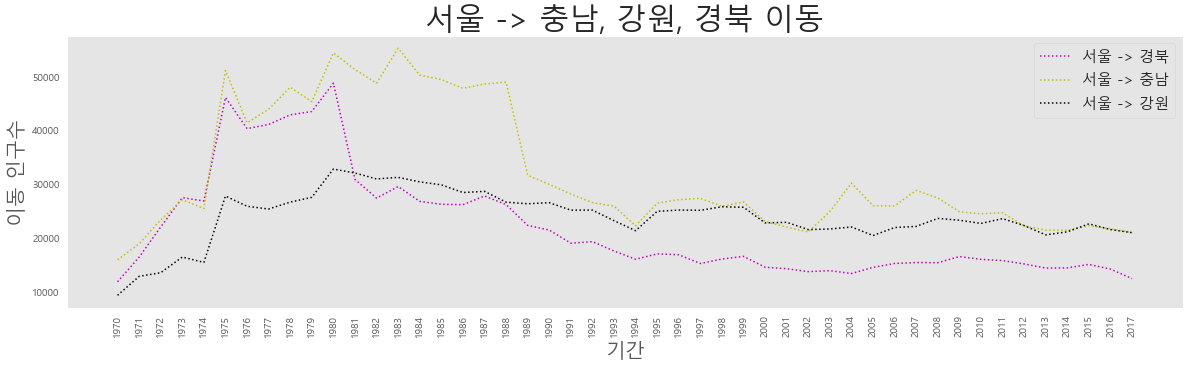

In [35]:
sr_one = df_seoul.loc['경상북도']
sr_two = df_seoul.loc['충청남도']
sr_three = df_seoul.loc['강원도']
fig = plt.figure(figsize=(20,5))
plt.plot(sr_one.index, sr_one.values, 'm:', sr_two.index, sr_two.values, 'y:', sr_three.index, sr_three.values, 'k:')
plt.title('서울 -> 충남, 강원, 경북 이동', size=30)     #차트 제목
plt.xlabel('기간', size=20)                             #x축
plt.ylabel('이동 인구수', size=20)     
plt.xticks(rotation=90)
plt.legend(labels=['서울 -> 경북', '서울 -> 충남', '서울 -> 강원'], loc='best', fontsize=15)   #범례 표시
plt.grid(False)
plt.show()

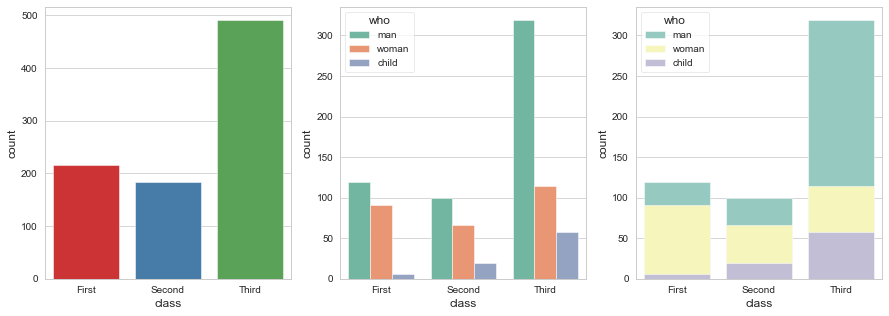

In [36]:
# 라이브러리 불러오기
titanic = sns.load_dataset('titanic')

# 스타일 테마 설정
sns.set_style('whitegrid')

# 그래프 객체 생성(figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# 기본값
sns.countplot(x='class', palette ='Set1', data=titanic, ax=ax1)

# hue 옵션에 'who' 추가
sns.countplot(x='class', hue ='who',palette ='Set2', data=titanic, ax=ax2)

# dodge = False 옵션 추가 (축 방향으로 분리하지 않고 누적 그래프 출력)
sns.countplot(x='class', hue='who', palette='Set3', dodge=False, data=titanic, ax=ax3)